### Практическое задание 1

<span style="color:blue"> **Задача №1**</span><br>

Найти производные функции:

1. $ y=\dfrac{x}{(1-x)^2(1+x)^3} $ <br><br>
2. $ y=\dfrac{x^p(1-x)^q}{1+x}$ , где $p,\ q$ — константы.
   

In [1]:
import sympy as sp
from sympy import init_printing, pretty, latex, pprint
init_printing()

x = sp.Symbol('x', real=True)

In [4]:
# Первое уравнение
y = x/((1-x**2)*(1+x)**3)
y

Производная функции:


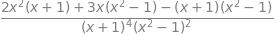

In [7]:
dy = sp.simplify(sp.diff(y, x))
print("Производная функции:")
display(dy)

In [8]:
# Второе уравнение
p,q = sp.symbols('p,q')

y = (x**p*(1-x)**q)/(1+x)
y

Производная функции:


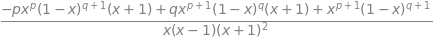

In [9]:
dy = sp.simplify(sp.diff(y, x))
print("Производная функции:")
display(dy)

___

<span style="color:blue"> **Задача №2**</span><br>

Найдите $f'(1)$, если

$ f(x)=x+ (x-1) \arcsin \left(\sqrt{\frac{x}{x+1}}\right)$

с помощью графика (постройте на графике две пересекающихся прямых в необходимой точке) и с помощью аналитического решения.

In [11]:
import sympy as sp
import numpy as np
from sympy import init_printing, pretty, latex, pprint
init_printing()

def getPlot():
    """ Служебная функция возврата объекта Plot
    """
    from sympy.plotting.plot import MatplotlibBackend
    be = MatplotlibBackend(p1)
    be.process_series()
    return be.plt

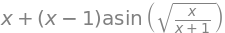

In [6]:
# Найдем производную с помощью аналитического решения (sympy)
x = sp.Symbol('x')
f = sp.Function('f')(x)

f = x + (x-1)*sp.asin(sp.sqrt(x/(x+1)))
f

Производная функции:


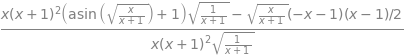

Производная в точке x0 равна:


Значение функции в точке x0 равно:


In [16]:
# Находим производную
df = sp.simplify((sp.diff(f, x)))
print("Производная функции:")
display(df)

# зададим исходную точку
x0 = 1
# Находим производную в заданной точке х=1
print("Производная в точке x0 равна:")
py = df.subs(x, x0)
display(py)
print("Значение функции в точке x0 равно:")
fx = f.subs(x, x0)
display(fx)

Уравнение касательной к графику функции в исходной точке:


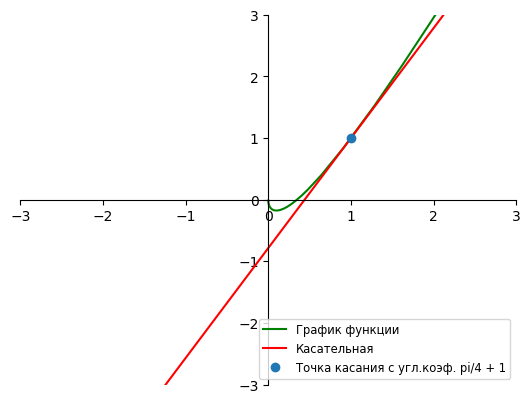

In [18]:
# Расчитаем уравнение касательной в исходной точке
y = py * (x - px) + fx
print("Уравнение касательной к графику функции в исходной точке:")
display(y)

# Построим графики
p1 = sp.plot(f, line_color='g', xlim=(-3,3), ylim=(-3,3), show=False, legend=True, autoscale=False, label="График функции", xlabel="", ylabel="")
p2 = sp.plot(y, line_color='red', xlim=(-3,3), ylim=(-3,3), show=False, legend=True, autoscale=False, label="Касательная")
p1.append(p2[0])
plt = getPlot()
plt.plot(px, y.subs(x,px), 'o', markersize=6, label=f"Точка касания с угл.коэф. {py}")
_ = plt.legend(fontsize="small", loc='lower right')

___

<span style="color:blue"> **Задача №3**</span><br>

Найдите производную для неявной функции и её значение при $x=2,\ y=4$.

$ x^2 + 2xy - y^2 - 2x = 0$

*Определить касательную к кривой в указанной точке, сравнив угол наклона касательной с полученной производной.*

In [12]:
import math
import sympy as sp
import numpy as np
from sympy import init_printing, latex, pprint
init_printing()

def getPlot():
    """ Служебная функция возврата объекта Plot
    """
    from sympy.plotting.plot import MatplotlibBackend
    be = MatplotlibBackend(p1)
    be.process_series()
    return be.plt

In [2]:
x, y = sp.symbols('x, y', real=True)
x0, y0 = (2, 4)

In [3]:
# Определим функцию в явном виде
f = (x)**2 + 2*x*y - y**2 - 2*x
idf = sp.idiff(f, y, x)
print("Производная функции:")
display(sp.simplify(idf))

Производная функции:


In [4]:
# Подставим начальные значения и найдем кожффициент наклона
k = idf.subs(y, y0).subs(x, x0)
print(f"Коэффициент наклона в заданной точке равен: {k}")

Коэффициент наклона в заданной точке равен: 5/2


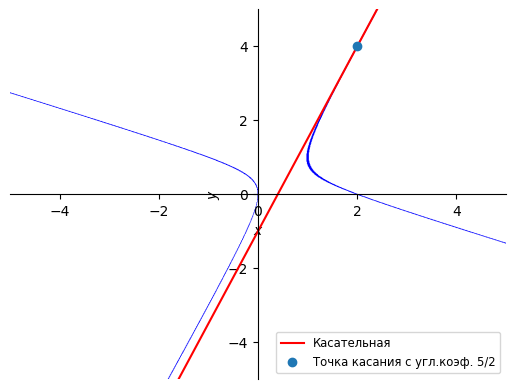

In [5]:
# Определим элементы для уравнения прямой (касетельной)
b = y0-k*x0
p1 = sp.plot_implicit(f, show=False, label="Исходная функция")
p2 = sp.plot(k*x+b, line_color='red', show=False, label="Касательная")
p1.append(p2[0])
plt = getPlot()
plt.plot(x0, y0, 'o', markersize=6, label=f"Точка касания с угл.коэф. {k}")
_ = plt.legend(fontsize="small", loc='lower right')

In [20]:
# Проверим значение коэффициента соотношением угла касательной (тангенс угла)
x1, y1 = sp.symbols('x1, y1', real=True)
# Найдем точку на оси Абсцисс (при у=0)
y1 = 0.
x1=(y/k-b/k).subs(y, y1)
delta = (y0-y1)/(x0-x1)

print(f"Угол касательной к оси X составляет: {delta:.2f}")

if math.isclose(delta, k):
    print(f"Угол касательной к оси X соответвует угловому коэффициенту {k:.2f} или {np.arctan(float(k))*(180/np.pi):.1f} градуса!")

Угол касательной к оси X составляет: 2.50
Угол касательной к оси X соответвует угловому коэффициенту 2.50 или 68.2 градуса!


___

<span style="color:blue"> **Задача №4**</span><br>

Закон движения точки по оси $0x$ задаётся формулой

$x=10t+5t^2$, где $t$ — время в секундах, а $x$ — расстояние в метрах.

Найдите мгновенную скорость движения, когда $t=20$. <br>Вычислите значение численно и аналитически, когда $\Delta t = 0.1$, $\Delta t = 0.01$.<br> Сравните ошибку между аналитическим и численным решением.

In [1]:
import sympy as sp
import numpy as np
import decimal
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.misc import derivative

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [5]:
# Мгновенная скорость материальной точки, движущейся по закону x(t), равна производной функции x' по времени t.
# Найдем производную функции x'(t)
t = sp.Symbol('t')
x = 10*t + 5*t**2

dx = sp.diff(x, t)
print("Производная функции движения точки:")
display(dx)
print(f"Мгновенная скорость движения точки в момент времени равный 20 сек.: {(dx.subs(t, 20)):.19f} метров/сек.")

Производная функции движения точки:


10*t + 10

Мгновенная скорость движения точки в момент времени равный 20 сек.: 210.0000000000000000000 метров/сек.


##### Рассчитаем величину скорости численными методами и сравним результат.

In [5]:
def calcDifferentialAndGetDataset(lstPoints: list):
    """ Функция расчета производных по времени с приращением.
        Подготовка набора данных по ошибкам расчетов производных 
        в разных подходах, для статистического сравнения.
        Сравниваются два массива расчитанных значений, беря 
        разность этих значений, в некий момент времени.
    """ 
    # Используя численные методы (Scipy)
    arrSciDeriv = list()
    for point in lstPoints:
        arrSciDeriv.append((
            point, 
            decimal.Decimal.from_float(derivative(lambda x: 10*x + 5*x**2, point))
        ))
    
    # Используя подход символьного счисления (Sympy)
    arrSymbDeriv = dict()
    t = sp.Symbol('t')
    x = 10*t + 5*t**2
    dx = sp.diff(x, t)
    for deriv, point in [(float(dx.subs({t:point})), point) for point in lstPoints]:
        arrSymbDeriv[point] = decimal.Decimal.from_float(deriv)

    resDataset = []
    for _, (time_point, sciDeriv) in enumerate(arrSciDeriv):
        try:
            symDeriv = arrSymbDeriv[time_point]
            resDataset.append((time_point, symDeriv - sciDeriv))
        except (KeyError, ValueError) as _:
            continue
    return pd.DataFrame(resDataset, columns=[
        'timepoint',
        'difference'
    ]).reset_index()
    
def drawDiffHistplot(axes, dataset, caption):
    """ Метод отрисовки гистограммы распределения ошибки 
        по сформированному набору данных.
    """
    axes.grid(axis='both', visible=True, linestyle="--", color='0.8')
    axes.set_title(caption) 
    
    # Построим гистограмму
    with sns.axes_style("ticks"):
        axes.set_xlabel("Различия (порядок значений $1" + sp.latex(sp.E**-13)+"$)", labelpad=20) 
        axes.set_ylabel('Количество расхождений.') 
        sns.histplot(
            data=dataset,
            x='difference', 
            shrink=0.95,
            ax=axes)
        for bar_ in axes.patches: 
            bar_.set_facecolor('pink')

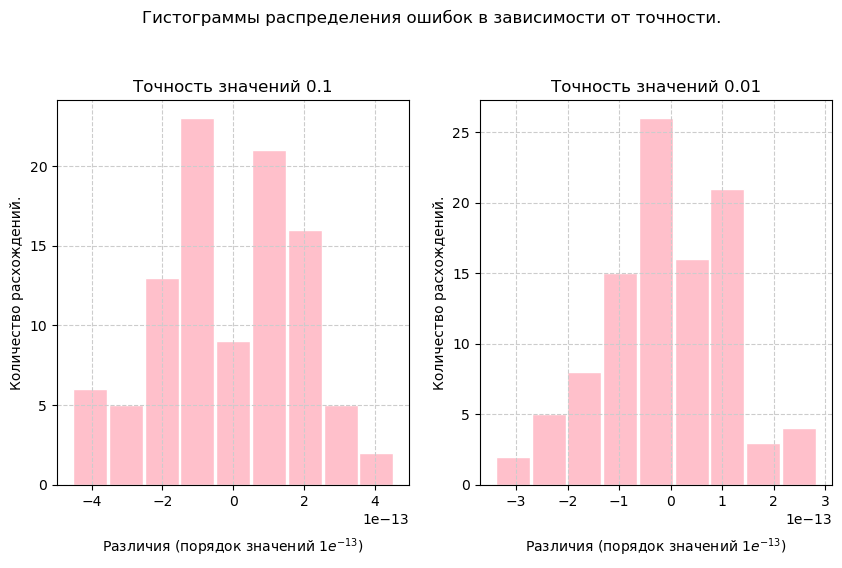

In [4]:
# Построим группу фигур (гистограм)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Гистограммы распределения ошибок в зависимости от точности.", y=1.06)

# Определим наборы данных в разных периодах времени с разными шагами точности.

# Диапазон времени от 20 до 30 с точностью представлений 0.1
drawDiffHistplot(
    axes[0], 
    calcDifferentialAndGetDataset(np.arange(20, 30, 0.1).tolist()),
    "Точность значений 0.1"
)
# Диапазон времени от 20 до 21 с точностью представлений 0.01
drawDiffHistplot(
    axes[1], 
    calcDifferentialAndGetDataset(np.arange(20, 21, 0.01).tolist()),
    "Точность значений 0.01"
)

#### Вывод:
Сравнивая статистическое отображение данных о различиях в вычислениях, можно заметить, что увеличение точности представления значений, коррелирует с уменьшением ошибок численного метода расчета (Scipy), по сравнению с аналитическим подходом (Sympy) вычисления производной. <br>На второй гистограмме (со значениями в точности 0.01), количество различий близко к нулю или около того.<br> *Это различие в результатах обуславливается приближением производной, что обеспечивает более точный результат.*